# Loan Application Status Prediction

# Data Description

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Exploratory Data Analysis

# Importing required Libariries


In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import power_transform
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [394]:
pd.set_option('display.max_rows',None)

# Importing Dataset

In [395]:
df=pd.read_csv('Loan_Application_Status_Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [396]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [398]:
df.shape #checking the data dimension

(614, 13)

We have 614 rows and 13 columns including the target column.

In [399]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [400]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Graphical Representation

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

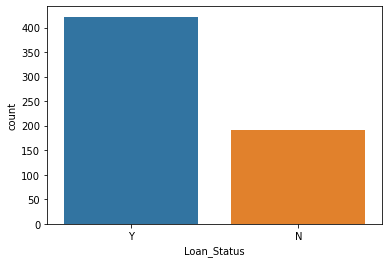

In [401]:
sns.countplot(df['Loan_Status'])

Just by observing above graph,The loan count status has been approved for almost 422 people of 684 peoples.

<AxesSubplot:xlabel='Gender', ylabel='count'>

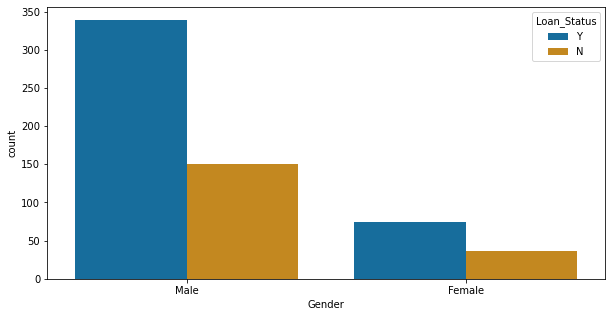

In [402]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Gender',hue='Loan_Status',data=df,palette='colorblind')

Just by Observing the above Graph,the loan status approval rate is high for male candiate and also has 30% of rejection rate.for female candiate,the approval is half of the candiate applied for the loan.

<AxesSubplot:xlabel='Married', ylabel='count'>

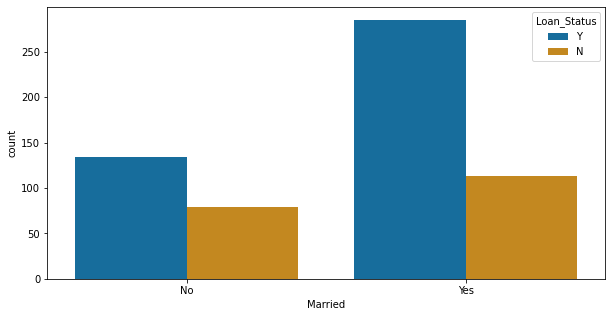

In [403]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Married',hue='Loan_Status',data=df,palette='colorblind')

Just by Observing the above Graph,the loan status approval rate is high for married candiate and also has 40% of rejection rate.for unmarried candiate,the approval is low for the candiate applied for the loan.

In [404]:
group=df.groupby(['Dependents','Loan_Status'])
Dependents_Loan_Status=group.size().unstack()

<AxesSubplot:xlabel='Loan_Status', ylabel='Dependents'>

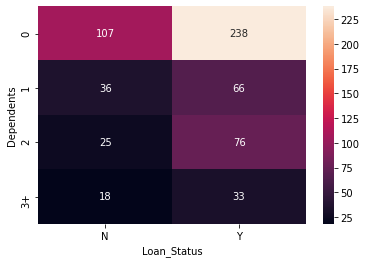

In [405]:
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(Dependents_Loan_Status, annot=True, fmt='d')

<AxesSubplot:xlabel='Education', ylabel='count'>

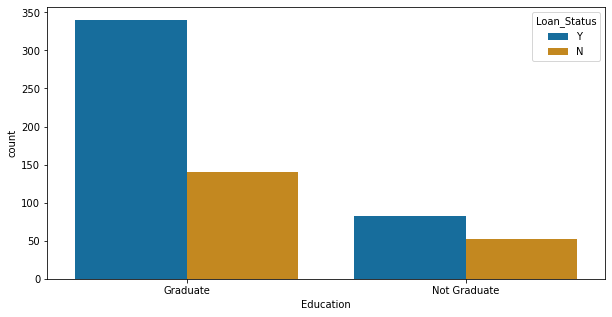

In [406]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Education',hue='Loan_Status',data=df,palette='colorblind')

Just observing above graph, the Graduated people has high chance of approval rate with 30% rejection rate.The Not Graduated people has low chance of approval rate with more rejection.

In [407]:
group=df.groupby(['Property_Area','Loan_Status'])
Property_Area_Loan_Status=group.size().unstack()

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

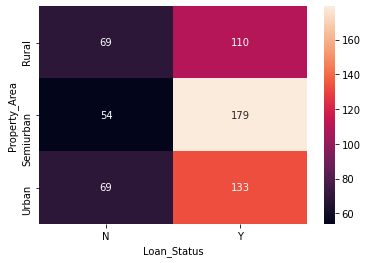

In [408]:
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(Property_Area_Loan_Status, annot=True, fmt='d')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

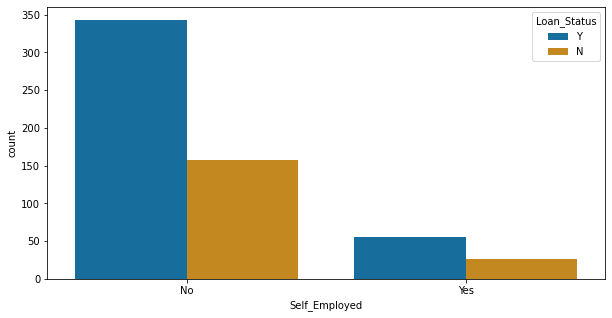

In [409]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df,palette='colorblind')

Just Observing the above graph, the Self Employed candiate has more chance of loan rejection rate.

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

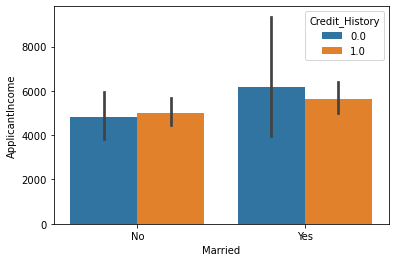

In [410]:
#barplot Display distribution of data across all level of category
sns.barplot(x='Married',y='ApplicantIncome',hue='Credit_History',data=df)

Just by observing graph,The Average income is high for unmarried person but chance of approval rate is low when compared to unmarried person.The approval rate is high for unmarried person with less income.

In [411]:
group=df.groupby(['Credit_History','Loan_Status'])
Credit_History_Loan_Status=group.size().unstack()

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

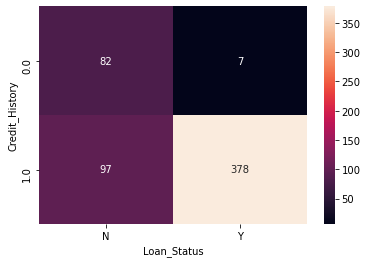

In [412]:
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(Credit_History_Loan_Status, annot=True, fmt='d')

Just by observing graph,the chance of approval rate is high for person whose credit history is classified from section 1.The chance of rejection rate of 90% whose credit history is classified from section 0.

Graphical Representation Conclusion

Finally loan status will be concluded from credit history.wheather the loan is to be approved or rejection.

# Preprocessing the dataset

In [413]:
df .dtypes #checking datatypes of dataset

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [414]:
df.describe()#statistics summary for numerical columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [415]:
#Checking the null values in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

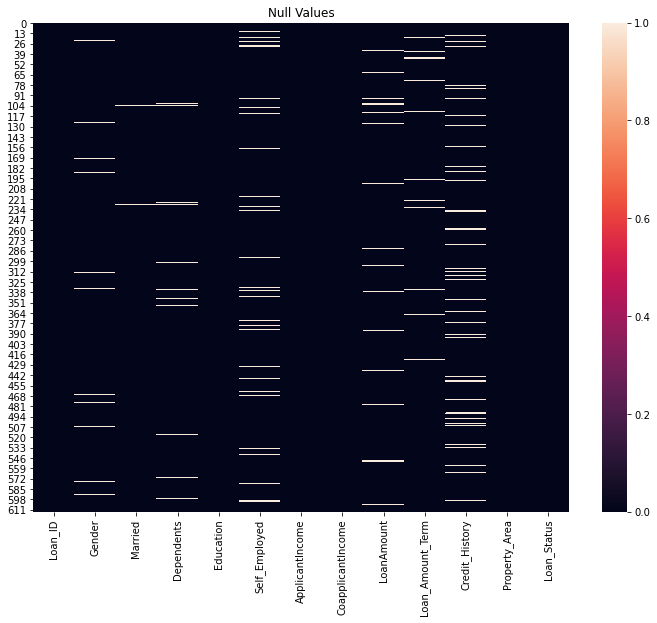

In [416]:
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [417]:
#filling the missing values for numerical terms by mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [418]:
df.isnull().sum()                #now all numerical null values are changed

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [419]:
#filling the missing values for categorical terms by mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [420]:
df.isnull().sum()#now all categorical null values are changed

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Numerical Variable Distribution

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

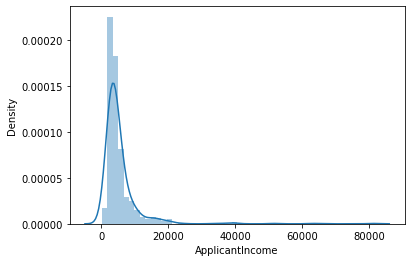

In [421]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

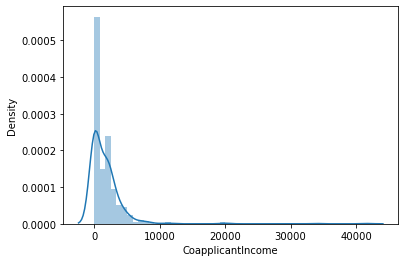

In [422]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

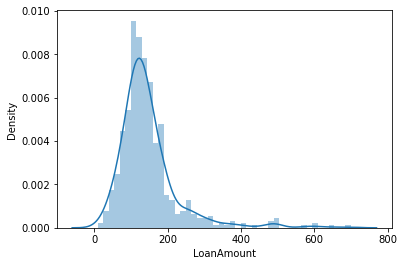

In [423]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

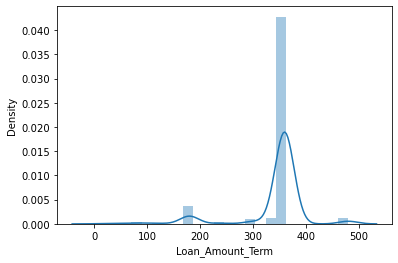

In [424]:
sns.distplot(df['Loan_Amount_Term'])

From the above distplot, we come across the income ,loan amount & terms.find skewness from above distribution.

# Converting all Object attributes into Numerical attributes by using LabelEncoder 

In [425]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,146.412162,360.0,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.0,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.0,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.0,1.000000,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.000000,360.0,1.000000,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.000000,360.0,1.000000,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.000000,360.0,0.000000,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.000000,360.0,1.000000,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.000000,360.0,1.000000,Semiurban,N


In [426]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [427]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [428]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.000000,146.412162,360.0,1.000000,2,1
1,1,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.000000,0,0
2,2,1,1,0,0,1,3000,0.000000,66.000000,360.0,1.000000,2,1
3,3,1,1,0,1,0,2583,2358.000000,120.000000,360.0,1.000000,2,1
4,4,1,0,0,0,0,6000,0.000000,141.000000,360.0,1.000000,2,1
5,5,1,1,2,0,1,5417,4196.000000,267.000000,360.0,1.000000,2,1
6,6,1,1,0,1,0,2333,1516.000000,95.000000,360.0,1.000000,2,1
7,7,1,1,3,0,0,3036,2504.000000,158.000000,360.0,0.000000,1,0
8,8,1,1,2,0,0,4006,1526.000000,168.000000,360.0,1.000000,2,1
9,9,1,1,1,0,0,12841,10968.000000,349.000000,360.0,1.000000,1,0


In [429]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

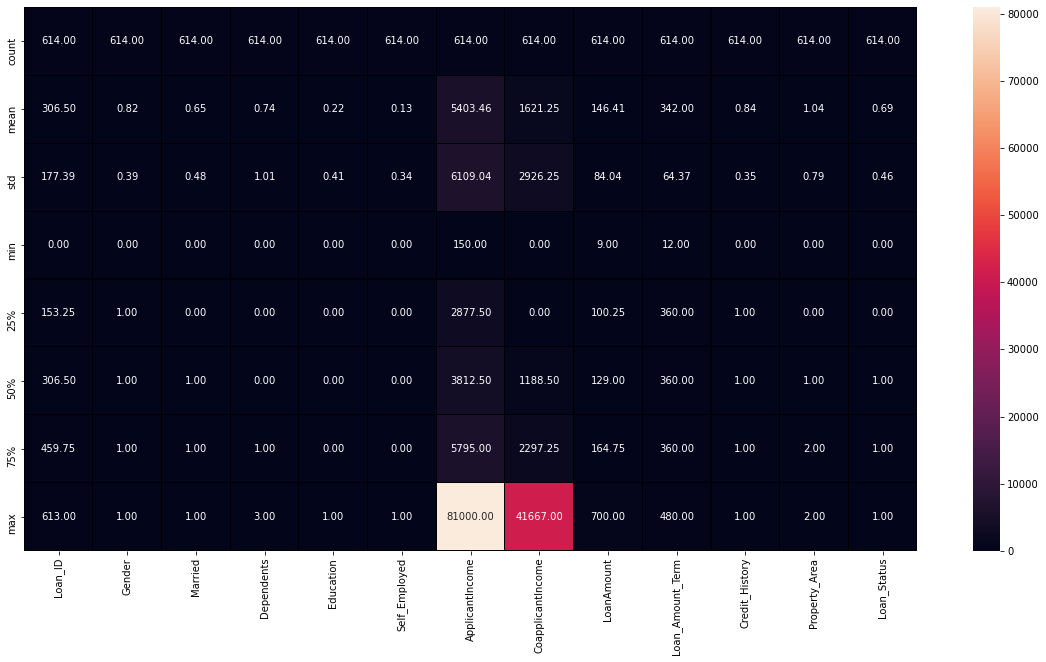

In [430]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correlation Matrix

In [431]:
dfcor=df.corr()
dfcor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<AxesSubplot:>

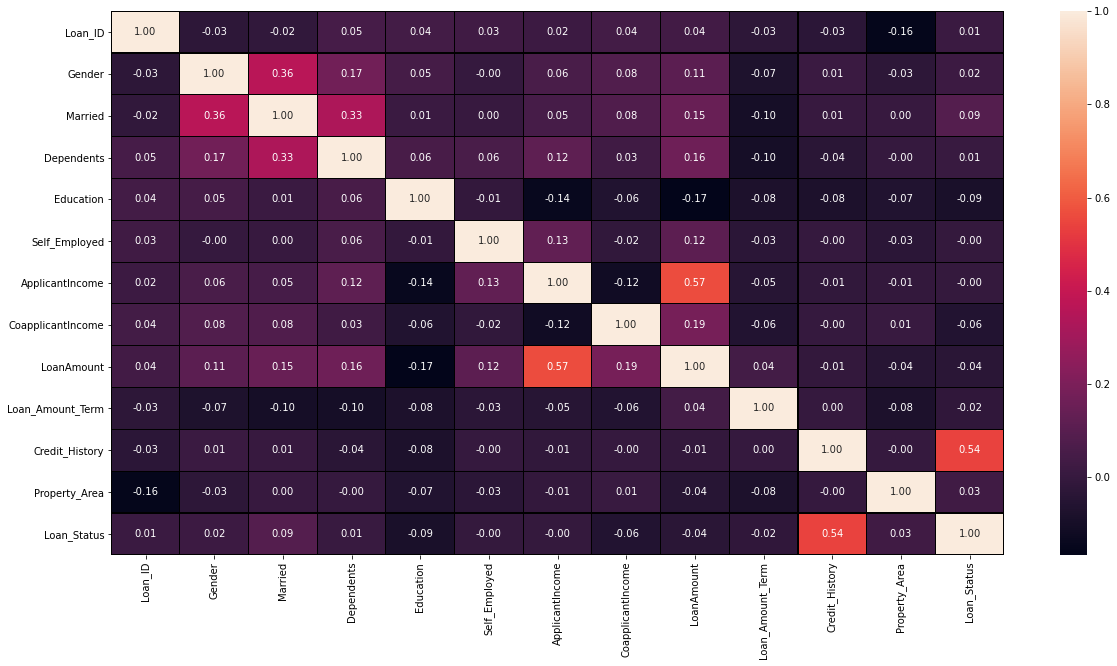

In [432]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Removing Outliers from the Dataset

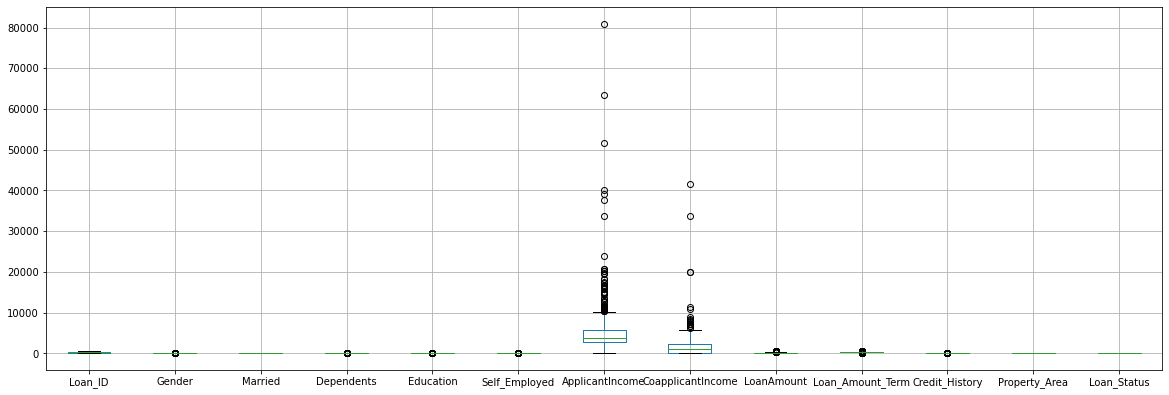

In [433]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [434]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.45164045, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.45164045, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.45164045, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.45164045, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.45164045, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.41044061, 0.04760721,
        1.48253724]])

In [435]:
df_new=df[(z<3).all(axis=1)]
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.000000,146.412162,360.0,1.000000,2,1
1,1,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.000000,0,0
2,2,1,1,0,0,1,3000,0.000000,66.000000,360.0,1.000000,2,1
3,3,1,1,0,1,0,2583,2358.000000,120.000000,360.0,1.000000,2,1
4,4,1,0,0,0,0,6000,0.000000,141.000000,360.0,1.000000,2,1
5,5,1,1,2,0,1,5417,4196.000000,267.000000,360.0,1.000000,2,1
6,6,1,1,0,1,0,2333,1516.000000,95.000000,360.0,1.000000,2,1
7,7,1,1,3,0,0,3036,2504.000000,158.000000,360.0,0.000000,1,0
8,8,1,1,2,0,0,4006,1526.000000,168.000000,360.0,1.000000,2,1
10,10,1,1,2,0,0,3200,700.000000,70.000000,360.0,1.000000,2,1


In [436]:
df.shape

(614, 13)

In [437]:
df_new.shape

(577, 13)

In [438]:
Data_loss=((614-577)/614*100)
Data_loss

6.026058631921824

# Checking Skewness of the dataset

In [439]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [440]:
x= df.drop('Loan_Status',axis=1)
y= df['Loan_Status']

In [441]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [442]:
df_new.skew()

Loan_ID             -0.287022
Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.599912
Property_Area       -0.158267
dtype: float64

In [443]:
x=df_new
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-2.156241,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.514063,1.193567
1,-2.131291,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.514063,-1.350003
2,-2.109873,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.514063,1.193567
3,-2.090468,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.514063,1.193567
4,-2.072435,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.514063,1.193567
5,-2.055425,0.472343,0.728816,1.316702,-0.528362,2.547117,0.427877,1.079210,1.486605,0.185905,0.514063,1.193567
6,-2.039220,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.911901,0.752226,-0.634406,0.185905,0.514063,1.193567
7,-2.023675,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.480672,0.910936,0.391249,0.185905,-2.247196,0.002361
8,-2.008685,0.472343,0.728816,1.316702,-0.528362,-0.392601,-0.038974,0.754275,0.517410,0.185905,0.514063,1.193567
9,-1.994170,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.687091,1.406405,2.060421,0.185905,0.514063,0.002361


Classification Model

In [444]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.7, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is " ,maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8209302325581396  on Random_state  113


In [445]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .7, random_state = 113)

Logistic Regressor Model

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8209302325581396
[[ 64  65]
 [ 12 289]]
              precision    recall  f1-score   support

           0       0.84      0.50      0.62       129
           1       0.82      0.96      0.88       301

    accuracy                           0.82       430
   macro avg       0.83      0.73      0.75       430
weighted avg       0.82      0.82      0.81       430



Decision Tree Classifier Model

In [447]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

0.6883720930232559
[[ 69  60]
 [ 74 227]]
              precision    recall  f1-score   support

           0       0.48      0.53      0.51       129
           1       0.79      0.75      0.77       301

    accuracy                           0.69       430
   macro avg       0.64      0.64      0.64       430
weighted avg       0.70      0.69      0.69       430



Random Foresrt Classifier Model

In [448]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8
[[ 64  65]
 [ 21 280]]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60       129
           1       0.81      0.93      0.87       301

    accuracy                           0.80       430
   macro avg       0.78      0.71      0.73       430
weighted avg       0.79      0.80      0.79       430



 SVM Model

In [449]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8069767441860465
[[ 61  68]
 [ 15 286]]
              precision    recall  f1-score   support

           0       0.80      0.47      0.60       129
           1       0.81      0.95      0.87       301

    accuracy                           0.81       430
   macro avg       0.81      0.71      0.73       430
weighted avg       0.81      0.81      0.79       430



We are getting highest accuracy with LogisticRegression(82%). but it can be due to overhitting also so we well check cross validation scores.

Cross Validation of model

In [450]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of LogisticRegression model:",scr.mean())

cross validation score of LogisticRegression model: 0.7997067839530854


In [451]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=5)
print("cross validation score of DecisionTree model:",scr.mean())

cross validation score of DecisionTree model: 0.6790883646541384


In [452]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of RandomForest model:",scr.mean())

cross validation score of RandomForest model: 0.7801279488204719


In [453]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model:",scr.mean())

cross validation score of SVC model: 0.7980674396907904


Min difference in accuracy and cross validation score is for Decision Tree Classifier model.so this is our best model.

# Hyper parameter Tuning

Hyperparameter tuning for Logistic Regression Model

In [454]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
             'C':[1e-5,1e-4,1e-2,1e-1,1,10,100]}
             
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [455]:
GCV.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [456]:
mod=LogisticRegression(C=0.1,penalty='l1',solver='saga',random_state=113)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.55813953488372


ROC_AUC Score for Logistic Regressor Model

In [457]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf=LogisticRegression(C=0.1,penalty='l1',solver='saga',random_state=113).fit(X,y)
roc_auc_score(y,clf.predict_proba(X)[:,1])
roc_auc_score(y,clf.decision_function(X))

0.9383092859785424

Hyperparameter tuning for Decision Tree Classifier Model

In [458]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [459]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [460]:
mod=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=113)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.55813953488372


ROC_AUC Score for Decision Tree Classifier Model

In [461]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf1=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=113).fit(X,y)
roc_auc_score(y,clf1.predict_proba(X)[:,1])

0.9751466624385603

Hyperparameter tuning for Random Forest Classifier Model

In [462]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto','sqrt','log2']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [463]:
GCV.best_params_

{'max_features': 'log2'}

In [464]:
mod=RandomForestClassifier(max_features='sqrt',random_state=113)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

80.23255813953489


ROC_AUC Score for Random Forest Classifier Model

In [465]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=RandomForestClassifier(max_features='sqrt',random_state=113).fit(X,y)
roc_auc_score(y,clf2.predict_proba(X)[:,1])

0.9999999999999999

Hyperparameter tuning for SVM model

In [466]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
GCV=GridSearchCV(SVC(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [467]:
GCV.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [468]:
mod=SVC(C=1,gamma=0.01,kernel='rbf',random_state=113)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.09302325581396


ROC_AUC Score for SVM Model

In [469]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=SVC(C=1,gamma=0.01,kernel='rbf',random_state=113).fit(X,y)
roc_auc_score(y,clf2.predict(X))

1.0

# Reciever Operating Characteristic(ROC)

In [470]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [471]:
#Import some data to play with
iris = datasets.load_iris()
X=iris.data
Y=iris.target

#Binarize the output
Y=label_binarize(Y,classes=[0,1,2])
n_classes=Y.shape[1]

# Add noisy feautures to make the problem harder
random_state=np.random.RandomState(18)
n_samples,n_features=X.shape
X=np.c_[X,random_state.randn(n_samples,200*n_features)]

#shuffle and so=plit training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.7,random_state=18)

#learn to predict each class against the other
classifier=OneVsRestClassifier(svm.SVC(C=100,gamma=0.001,kernel='rbf',probability=True,random_state=18))
Y_score=classifier.fit(X_train,Y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class 
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(Y_test[:,i],Y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"],tpr["micro"],_=roc_curve(Y_test.ravel(),Y_score.ravel())
roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])

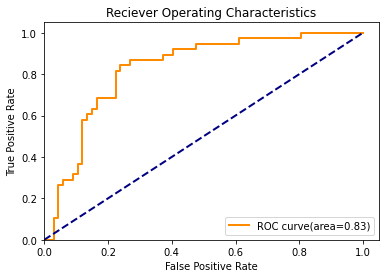

In [472]:
plt.figure()
lw=2
plt.plot(fpr[2],tpr[2],color='darkorange',
        lw=lw,label='ROC curve(area=%0.2f)'%roc_auc[2])
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

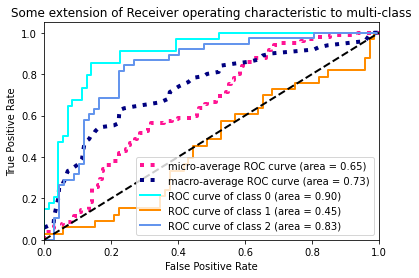

In [473]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [474]:
Y_prob=classifier.predict_proba(X_test)
macro_roc_auc_ovo=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="macro")
weighted_roc_auc_ovo=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="weighted")
macro_roc_auc_ovr=roc_auc_score(Y_test,Y_prob,multi_class="ovr",average="macro")
weighted_roc_auc_ovr=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="weighted")

print("One-vs-One ROC AUC scores:\n{:.5f}(macro),\n{:.5f}"
     "(weighted by prevalance)"
     .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-One ROC AUC scores:\n{:.5f}(macro),\n{:.5f}"
     "(weighted by prevalance)"
     .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.75749(macro),
0.76210(weighted by prevalance)
One-vs-One ROC AUC scores:
0.75749(macro),
0.76210(weighted by prevalance)


Compare with Actual Final Vs Sample Prediction

,Y Test,Prediction
557,1,1
564,0,0
175,1,1
41,1,1
248,1,1


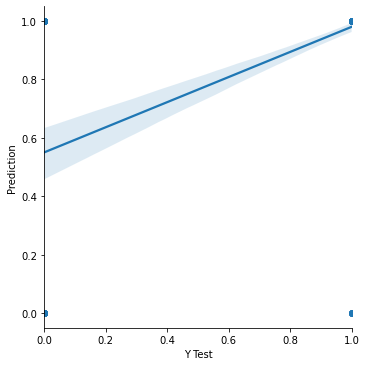

In [475]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Saving the Model

In [476]:
import joblib
joblib.dump(mod,"loan application status prediction.pkl")

['loan application status prediction.pkl']

# Loading the saved model

In [477]:
model=joblib.load("loan application status prediction.pkl")
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction)*100)

82.09302325581396


In [479]:
prediction=pd.DataFrame(prediction)  # Converting into Data Frame
prediction.to_csv('Results of loan application status prediction.csv')
prediction

,0
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
